### Linear Support Vector Classifier

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn import svm

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

In [108]:
X = [1, 5, 1.5, 8, 1, 9]
Y = [2, 8, 1.8, 8, 0.6, 11]

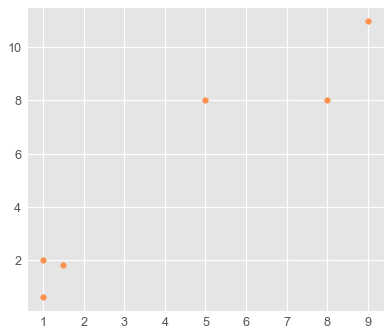

In [109]:
# Visualmente podemos dibujar una recta (hiperplano d1) para separar 2 grupos fácilmente
plt.scatter(X, Y, c = "y")
plt.show()

In [110]:
data = np.array(list(zip(X, Y)))
data # Array de datos combinados

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [111]:
# Algoritmo supervisado: toca etiquetar los datos
# Los puntos de abajo -> 0 | puntos de arriba -> 1
target = [0, 1, 0, 1, 0, 1]

In [112]:
# Support Vector Classifier - Fase de aprendizaje
# Kernel o tipo de separador (hiperplano a buscar)
classifier = svm.SVC(kernel = "linear", C = 1.0)
classifier.fit(data, target) # Creación del modelo

SVC(kernel='linear')

In [113]:
# Predicción - testeo de nuestro modelo
p = np.array([10.32, 12.67]).reshape(1, 2)
classifier.predict(p)

array([1])

#### Representación gráfica
- Modelo: w0*x + w1*y + e = 0
- Ecuación del hiperplano 2D: y = a*x + b

In [114]:
w = classifier.coef_[0]
w # Pesos de las categorías

array([0.1380943 , 0.24462418])

In [115]:
a = -w[0]/w[1]
a # Pendiente de la recta

-0.564516129032258

In [116]:
b = -classifier.intercept_[0]/w[1]
b # Ordenada en el origen b

6.734677437813051

In [117]:
xx = np.linspace(0, 10) # Vector de números entre 0 y 10
yy = a*xx + b # Ecuación del hiperplano en 2D (recta)

[]

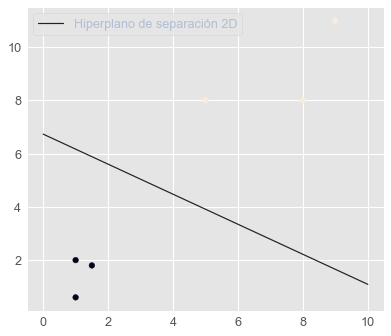

In [118]:
plt.plot(xx, yy, "k-", label = "Hiperplano de separación 2D")
plt.scatter(X, Y, c = target)
plt.legend()
plt.plot()

### Support Vector Machine

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

# Generador de muestras
from sklearn.datasets import make_blobs

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [120]:
# Número de muestras, 2 centros distintos, semilla, desviación estándar
X, Y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.6)

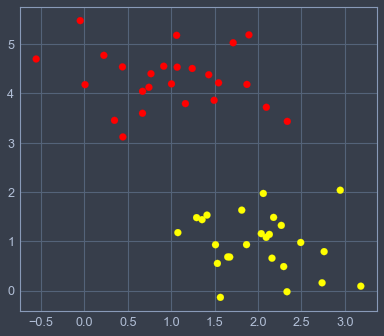

In [121]:
# Todas las filas de la 1ra y 2da columna, color determinado por Y, tamaño del gráfico, color
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")

(-1.0, 3.5)

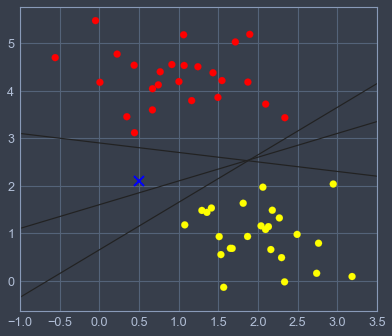

In [122]:
xx = np.linspace(-1, 3.5) # Distribución de puntos de -1 a 3.5
# Volvemos a hacer el gráfico anterior
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
# Agregamos un punto adicional, dificil de clasificar
# eje x, eje y, forma, color, tamaños
plt.plot([0.5], [2.1], "x", color = "blue", markeredgewidth = 2, markersize = 10)

# Posibles hiperplanos
for a, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a*xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1, 3.5)

#### Maximización del margen (damos color al pasillo)

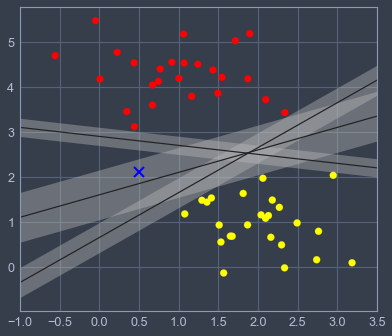

In [123]:
# En lugar de pintar una recta, pintamos el pasillo más ancho posible hasta encontrar el 1er punto
xx = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
plt.plot([0.5], [2.1], "x", color = "blue", markeredgewidth = 2, markersize = 10)

# Gráfica de pasillos (eje x, eje y, proyección ortogonal) (a, b, d)
# Hallamos la línea que maximiza el margen y hallar la solución más óptima
for a, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yy = a*xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor = "none", color = "#BBBBBB", alpha = 0.4)
    
    plt.xlim(-1, 3.5)

#### Creación del modelo SVM

In [124]:
# Librería de Support Vector Machine de Skelearn
from sklearn.svm import SVC

In [125]:
# Modelo SVC, kernel (separador) lineal, parámetro a analizar
model = SVC(kernel = "linear", C = 1E10)
# X: data | Y: clase (0, 1)
model.fit(X, Y)

SVC(C=10000000000.0, kernel='linear')

In [126]:
# Modelo, eje, pintamos el soporte (pasillo)
def plt_svc(model, ax = None, plot_support = True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    # Si no se introduce ax establecemos la gráfica a realizar
    if ax is None:
        ax = plt.gca()
    
    # Límites de los ejes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Parrilla de puntos para evaluar el modelo (30 puntos)
    xx = np.linspace(xlim[0], xlim[1], 30) # Filas
    yy = np.linspace(ylim[0], ylim[1], 30) # Columnas
    # Juntamos los puntos
    Y, X = np.meshgrid(yy, xx)
    
    # Combinación de puntos y tupla
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) # Redimencionamiento de los puntos (clasificación)
    
    # Representación de las fronteras y márgenes del Support Vector Classifier
    # Puntos, color, niveles, transparencia, tipo de línea
    ax.contour(X, Y, P, colors = "k", levels = [-1, 0, 1], alpha = 0.5, linestyles = ["--", "-", "--"])
    
    # Support Vectors
    print(model.support_vectors_) # Imprimimos los vectores de soporte
    
    # Marcamos los puntos de soporte vectorial
    if plot_support:
        # Pintamos todas las filas del punto 0 (X) y todas las filas del punto 1 (Y)
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s = 30, linewidth = 1, facecolors = "black")
        
        # Ajustamos los límites
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


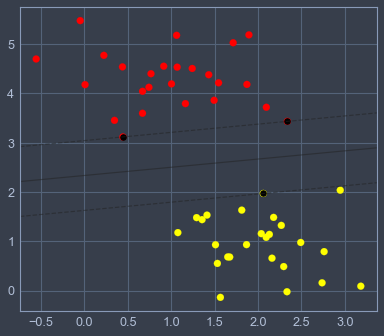

In [127]:
# Debemos encontrar el soporte vectorial (puntos negros)
# Pintamos los puntos
# La coloración depende de Y -> clasificador 0 y 1
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support = True) # Pasamos el modelo y graficamos

In [128]:
# Función Support Vector Machine
def plot_svm(N = 10, ax = None):
    # Número de muestras, 2 centros, semilla, desviación estándar
    X, Y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.6)
    
    X = X[:N] # Filas hasta N
    Y = Y[:N] # Filas hasta N
    model = SVC(kernel = "linear", C = 1E10) # Modelo SVC
    model.fit(X, Y) # Creamos el modelo SVC
    
    # Gráfica
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plt_svc(model, ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


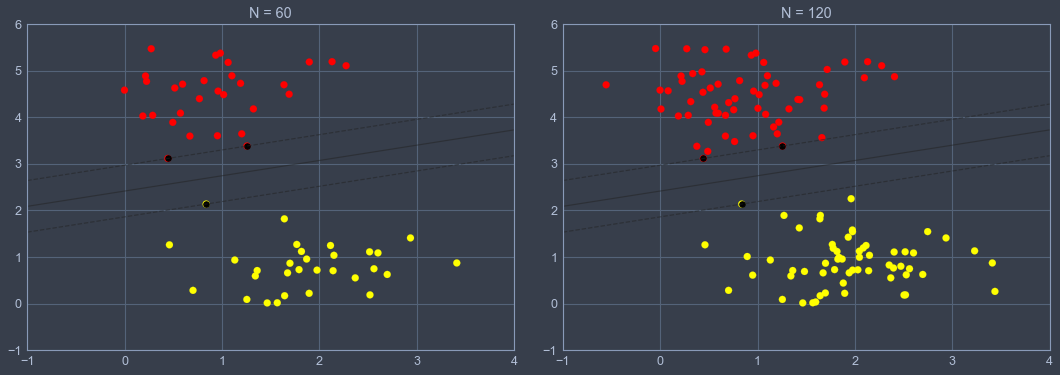

In [129]:
# Graficamos 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
# Margen izquierdo, margen derecho, espacio horizontal respecto al tamaño total
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip (ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N = {0}".format(N))

In [130]:
# Librería que permite realizar un Widget interactivo
from ipywidgets import interact, fixed

In [131]:
interact(plot_svm, N = [10, 50, 100], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 100), value=10), Output()), _dom_classes=('wi…

<function __main__.plot_svm(N=10, ax=None)>

#### Fronteras no lineales

In [132]:
# Librería que permite realizar un Widget interactivo
from sklearn.datasets import make_circles, make_blobs

In [133]:
# Distribución circular de puntos (100 puntos, factor, ruido)
X, Y = make_circles(100, factor = 0.1, noise = 0.1)

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [135]:
def plt_svc(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, color = "k", levels = [-1, 0, 1], alpha = 0.5, linestyles = ["--", "-", "--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
        s = 100, linewidth = 1, facecolors = "blue")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

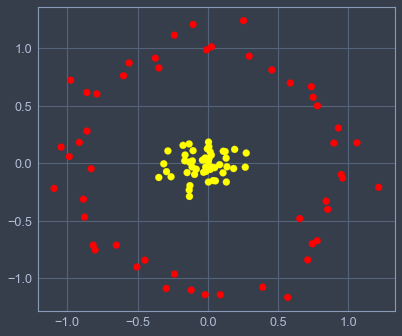

In [136]:
# Representación gráfica
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")

C:\Users\Carlos\anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


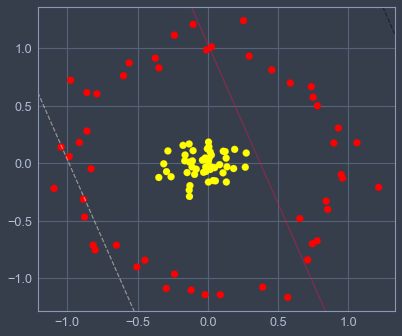

In [137]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
plt_svc(SVC(kernel = "linear").fit(X, Y), plot_support = False)

In [138]:
# Debemos aumentar la dimensión con la que trabajamos
# Suponer que nuestros datos .D son una proyeccción que viven en una dimensión superior
r = np.exp(-(X**2).sum(1)) # Separador aleatorio, simulamos una campana de gauss
# Camapa de gauss normalizada (suma 1)

In [139]:
from mpl_toolkits import mplot3d

In [140]:
def plot_3D(elev = 30, azim = 30, X = X, Y = Y, r = r):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c = Y, s = 50, cmap = "autumn")
    ax.view_init(elev = elev, azim = azim) # Grado horizontal y vertical de la proyección 3D
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [141]:
from ipywidgets import interact, fixed

In [142]:
interact(plot_3D, elev = [-90, -60, -30, 0, 30, 60, 90],
        azim = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180],
        X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.00769406,  0.14371767],
       [ 0.13651584, -0.03057901],
       [-0.28425455,  0.10750197],
       [-0.10504993,  1.20574805],
       [-0.34834949,  0.82868958],
       [ 0.04876141, -0.03748934],
       [-0.97632992,  0.72176358],
       [ 0.95849124, -0.12753293],
       [-0.44775952, -0.84126526],
       [ 0.02512971,  0.07218759],
       [ 0.85296502, -0.39985046],
       [-0.2940594 , -0.07219451],
       [-0.13073465, -0.28762418],
       [ 0.00414838, -0.1628275 ],
       [ 0.77818713, -0.67233176],
       [ 0.25365763,  1.23902833],
       [ 0.27321009,  0.08935232],
       [-0.00328517,  0.12654488],
       [-0.65094513, -0.71060002],
       [ 0.19082995,  0.1210284 ],
       [ 0.01672888,  0.099336  ],
       [-0.50493663, -0.89938318],
       [ 0.7437276 , -0.69834158],
       [-0.1644664 ,  0.02202052],
       [-0.60027451,  0.76077534],
       [ 1.06119879,  0.17827126],
       [-0.26187035, -0.11653609],
       [

In [143]:
# Radial Basic Funcion -> Buscamos formas circulares
rbf = SVC(kernel = "rbf", C = 1E6)
rbf.fit(X, Y) # Creamos el modelo

SVC(C=1000000.0)

C:\Users\Carlos\anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


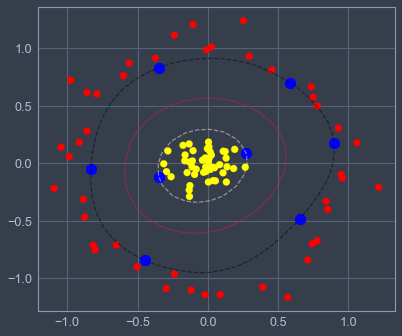

In [144]:
# Separación lineal en un espacio de dimensión superior
# La proyección de la separación en nuestra dimensión sea posible de analizar
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn") # Puntos
plt_svc(rbf) # Incorporamos las líneas
# Support Vector Points
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1],
           s = 100, lw = 1, facecolors = "blue")

#### Ajustar los parámetros de SVM

In [145]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)

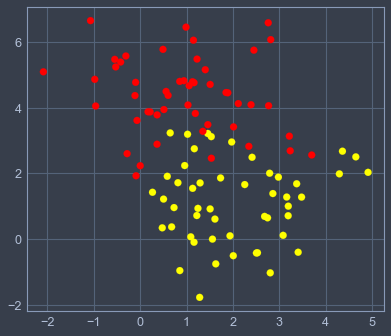

In [146]:
# La distribución de puntos es más complicado
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")

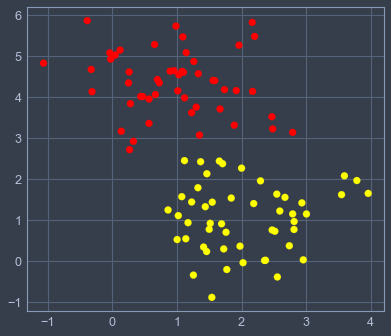

In [147]:
# Parámetro para relajar las restricciones de margen
# Reducimos la desviación estándar y vemos la diferencia
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")

C:\Users\Carlos\anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  
C:\Users\Carlos\anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


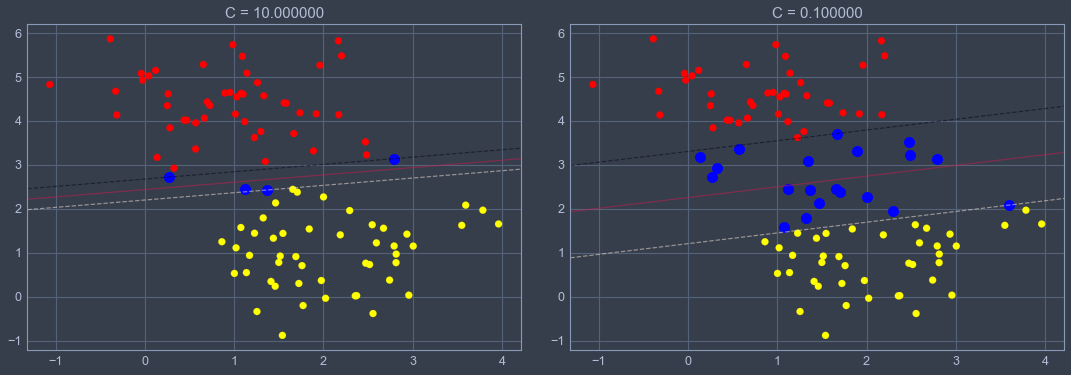

In [148]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6)) # Graficamos
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1) # Ajustamos los márgenes

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = "linear", C = C) # kernel lineal y C variable
    model.fit(X, Y) # Creamos el modelo
    ax_i.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn") # Gráfica
    plt_svc(model, ax_i) # Pasamos el modelo y ax
    ax_i.set_title("C = {0:1f}".format(C), size = 15) # Título

C:\Users\Carlos\anaconda3\envs\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  


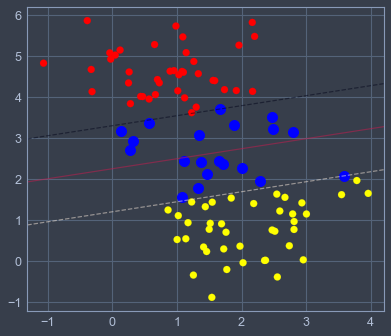

In [149]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
model = SVC(kernel = "linear", C = 0.10) # Probar con distintos valores de C
model.fit(X, Y)
plt_svc(model)